In [63]:
import nibabel as nib
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

l = glob.glob(f'{ABS_PATH}/*/*/crop_by_*')
dict_paths = {}
for line in l:
    key = line.split('/')[-3]
    dict_paths[key] = line

# dict_paths

In [65]:
ABS_PATH = '/home/guilherme/Documents/noa/cidia19/data/PHNN-HMV-HCPA/exame-pulmao'
PATH_1 = f'{ABS_PATH}/C74/NMEFHLEI/E0X5V30O.nii.gz'
PATH_2 = f'{ABS_PATH}/TYP-019/TYP-019/TYP-019.nii.gz'
DF_PATH = '/home/guilherme/Documents/noa/cidia19/jupyter/csv/input/all_hmv_hcpa.csv'
OUTPUT_PATH = '/home/guilherme/Desktop/noa'
COLORS = {'ATYPICAL': mcolors.TABLEAU_COLORS['tab:orange'], 'INDETERMINATE': mcolors.TABLEAU_COLORS['tab:green'], 
        'NEGATIVE': mcolors.TABLEAU_COLORS['tab:red'],'POSITIVE': mcolors.TABLEAU_COLORS['tab:blue'] }

{'ATYPICAL': '#ff7f0e',
 'INDETERMINATE': '#2ca02c',
 'NEGATIVE': '#d62728',
 'POSITIVE': '#1f77b4'}

In [49]:
#Load real values:
df = pd.read_csv(DF_PATH)
dict_diagnosis = {}
for index, row in df.iterrows():
    dict_diagnosis[row['nome']] = row['covid']
# dict_diagnosis

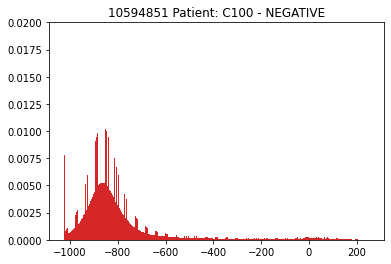

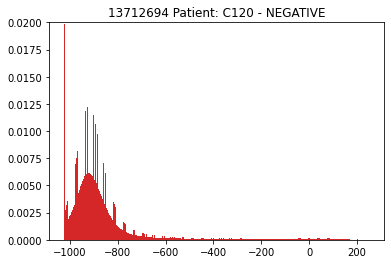

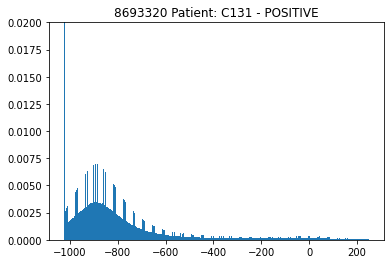

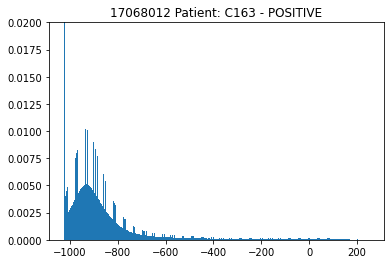

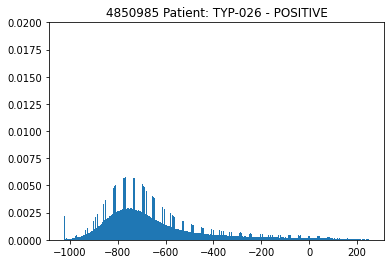

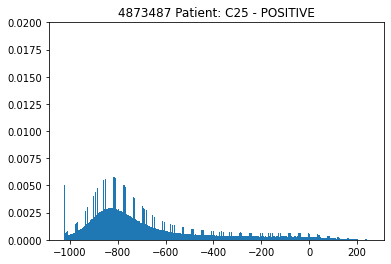

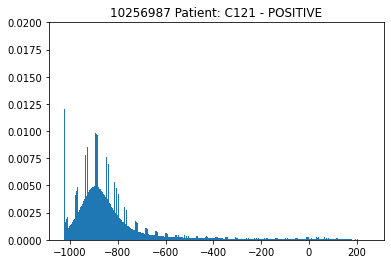

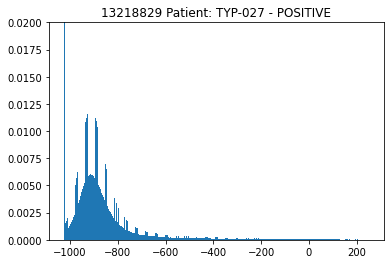

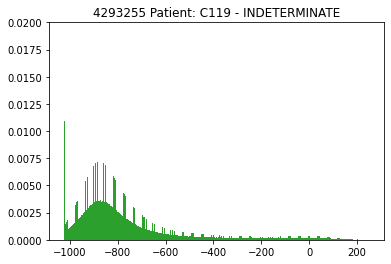

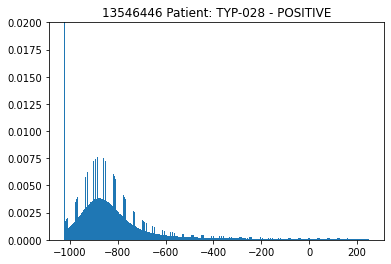

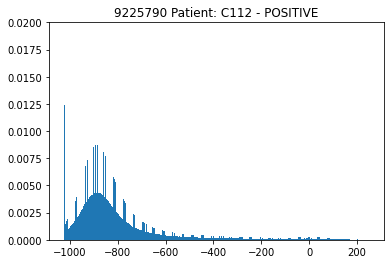

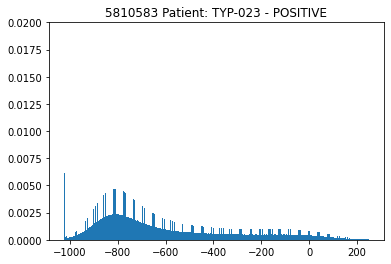

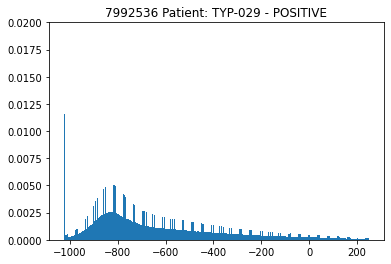

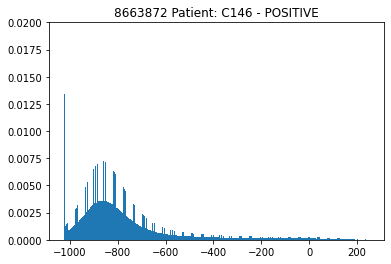

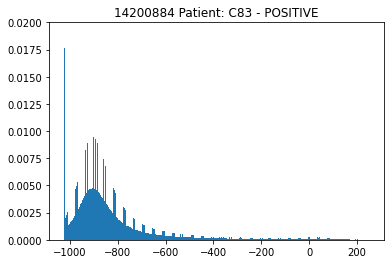

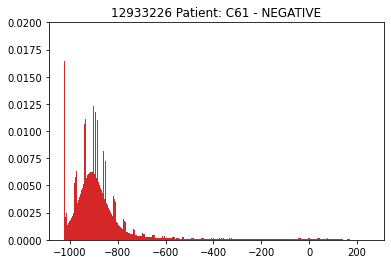

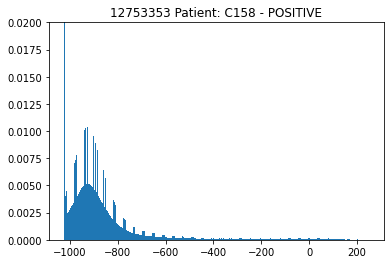

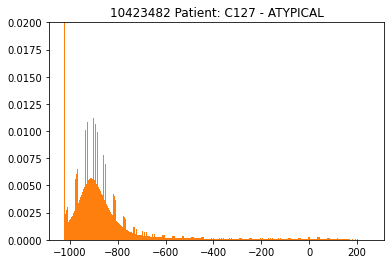

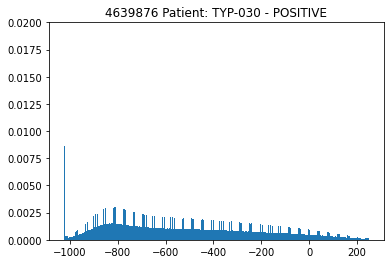

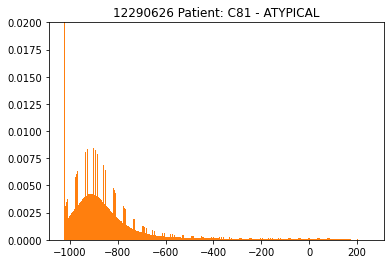

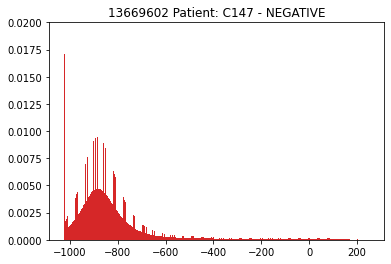

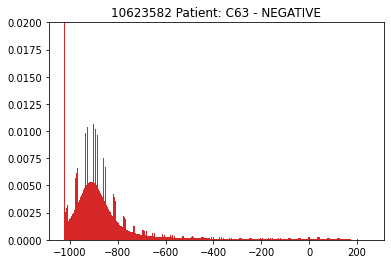

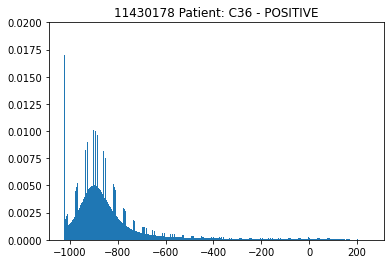

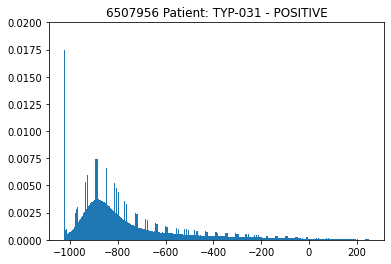

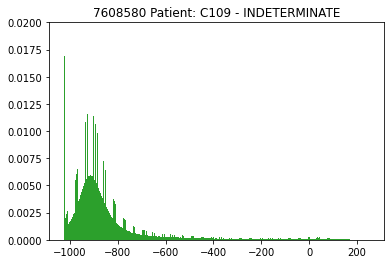

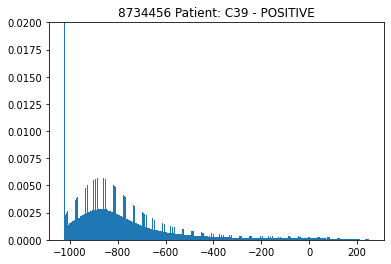

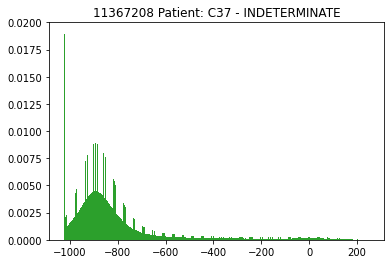

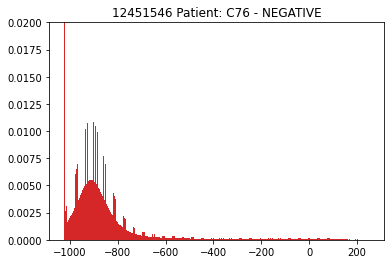

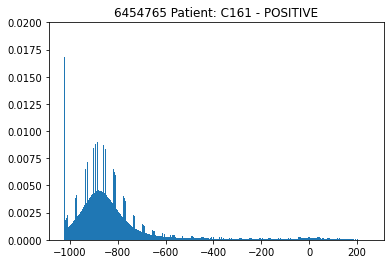

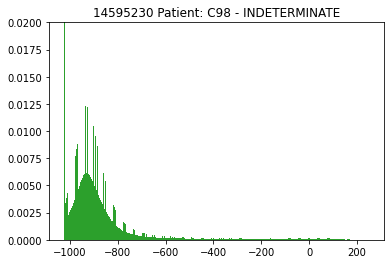

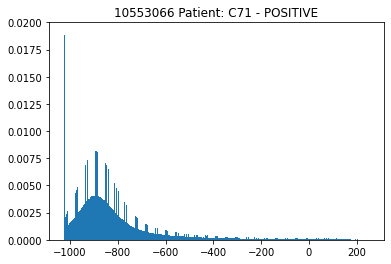

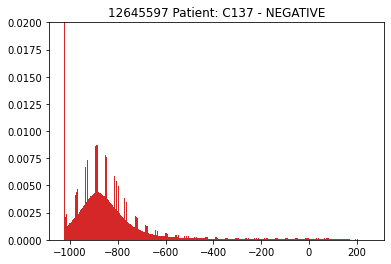

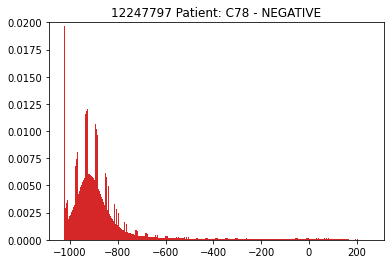

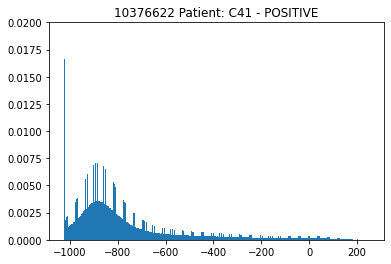

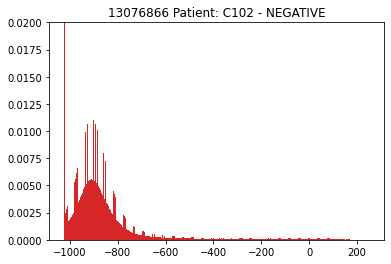

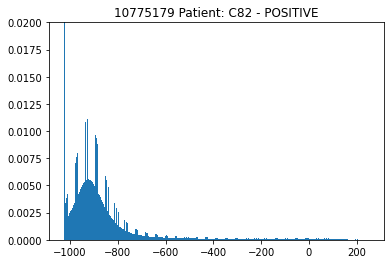

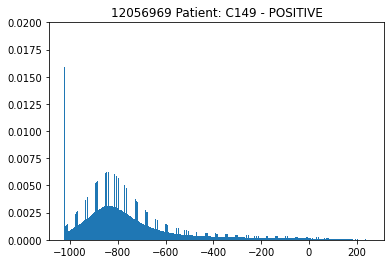

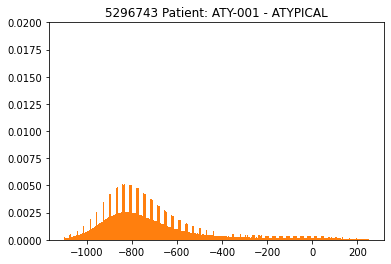

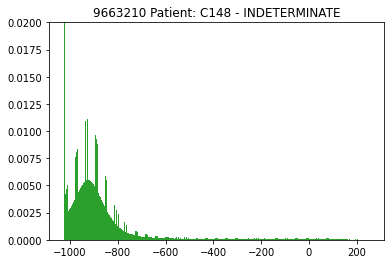

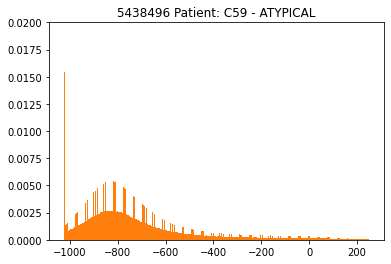

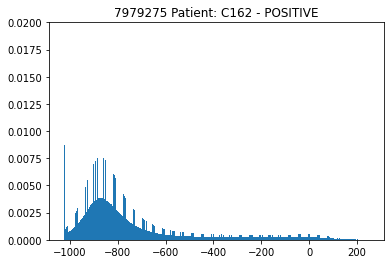

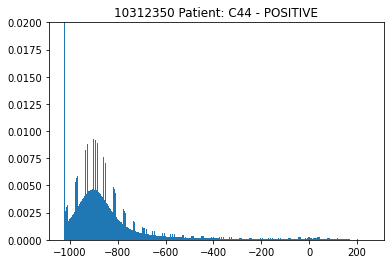

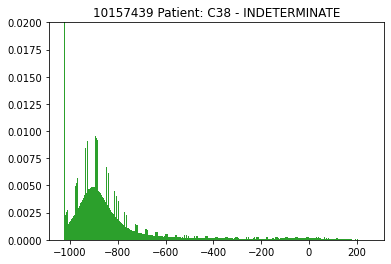

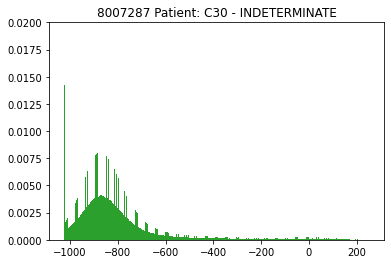

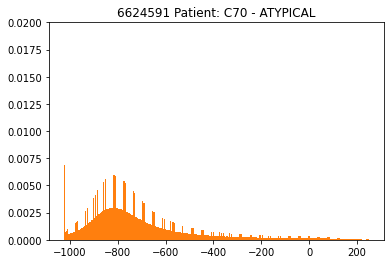

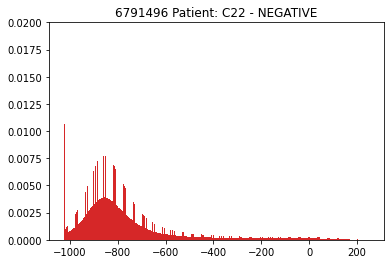

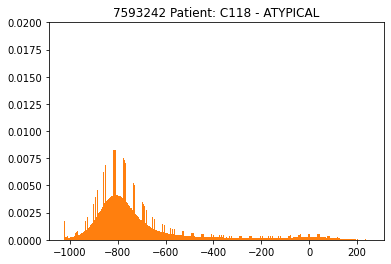

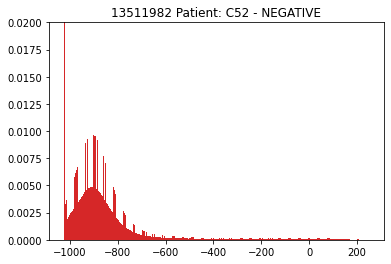

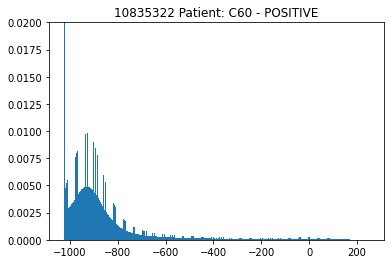

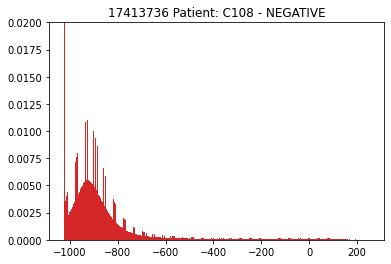

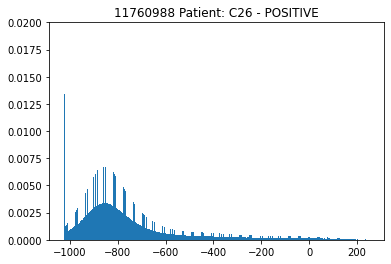

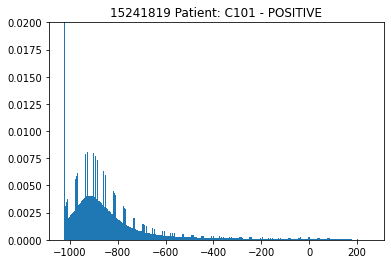

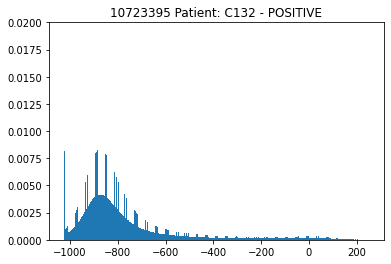

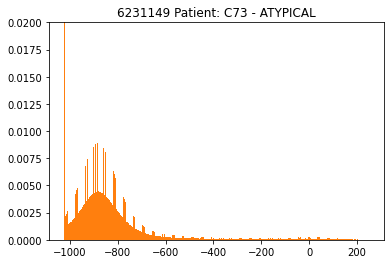

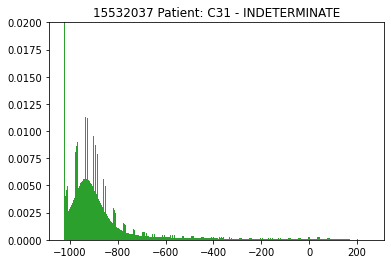

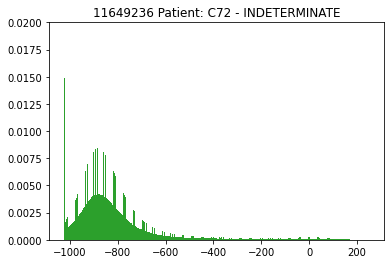

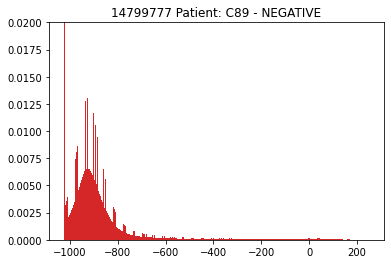

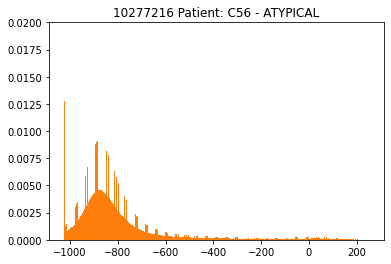

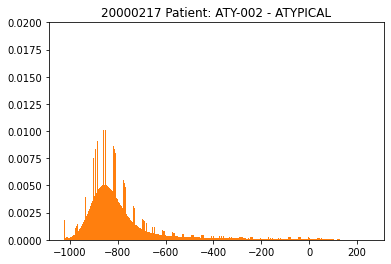

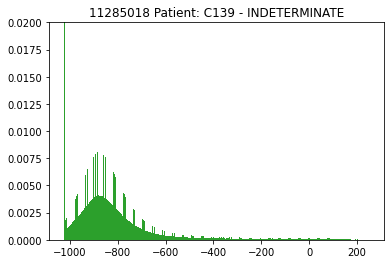

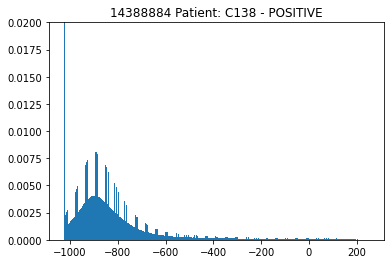

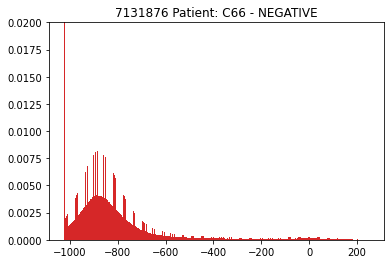

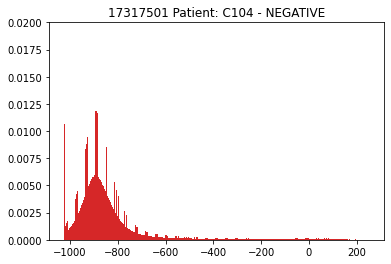

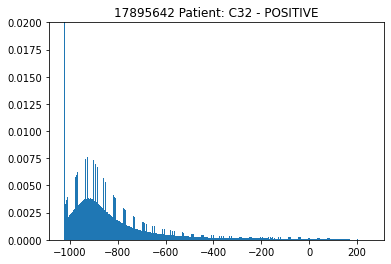

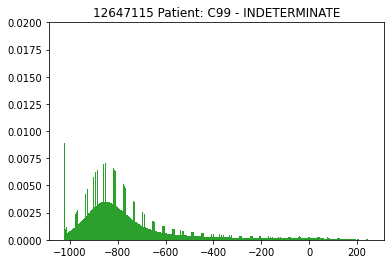

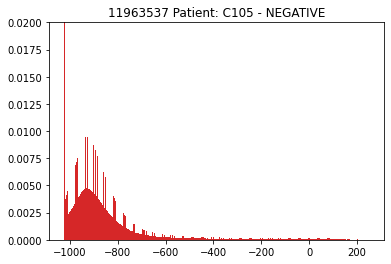

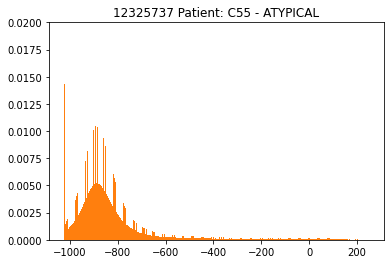

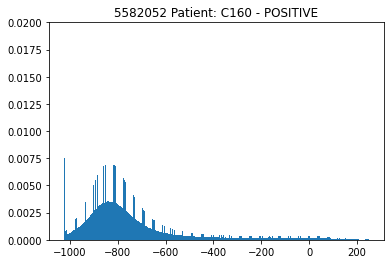

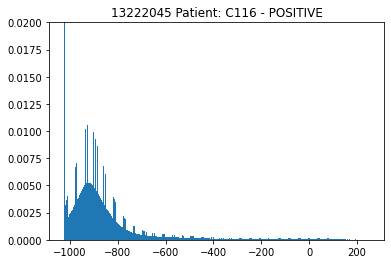

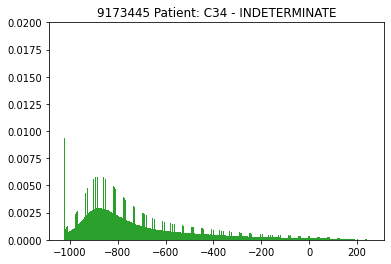

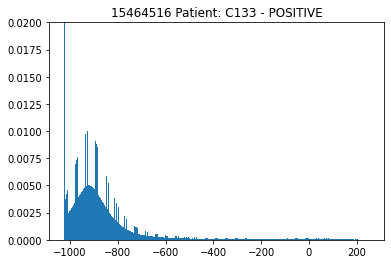

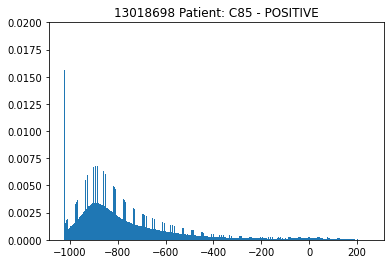

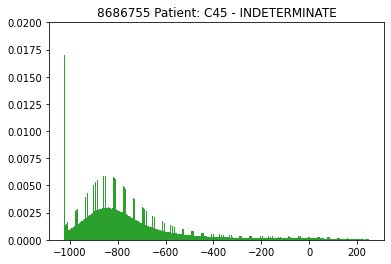

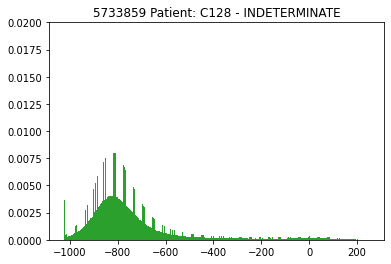

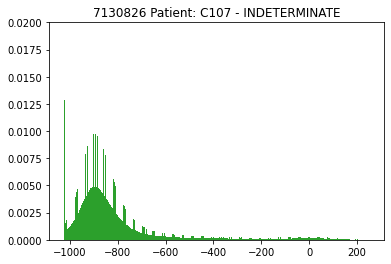

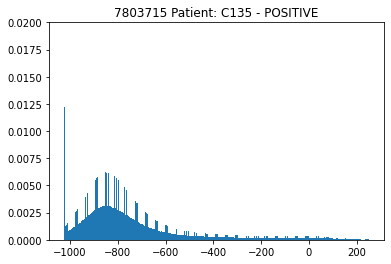

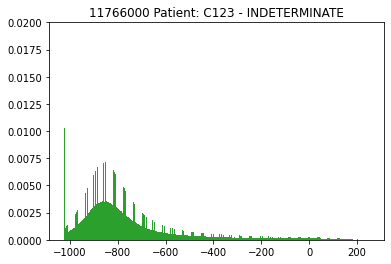

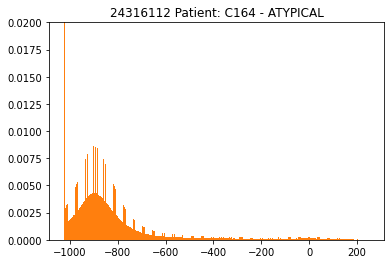

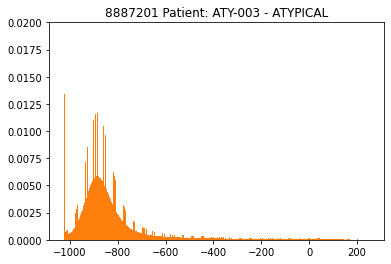

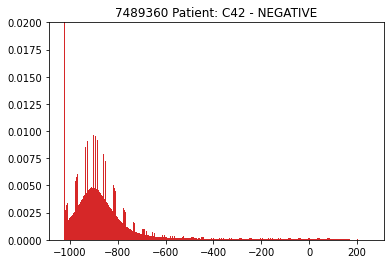

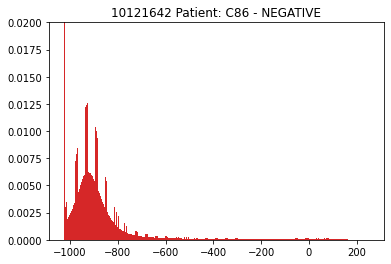

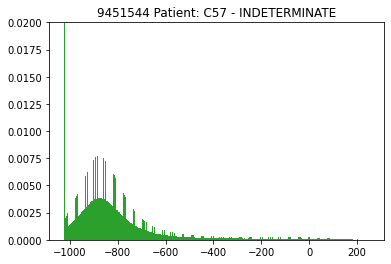

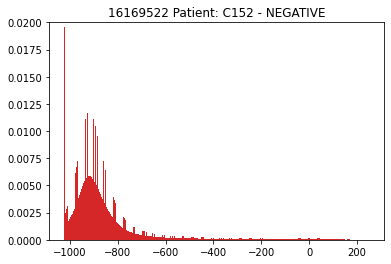

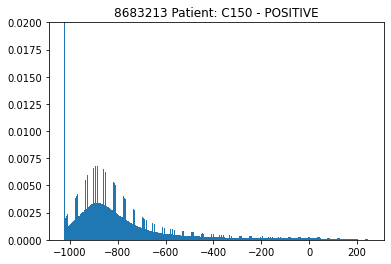

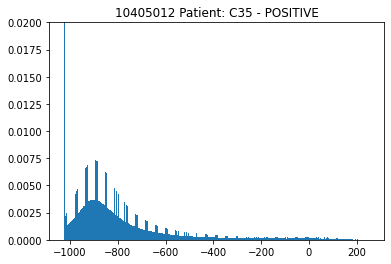

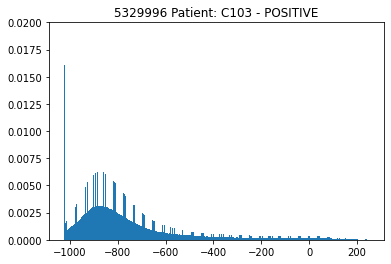

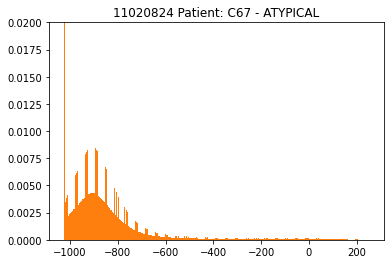

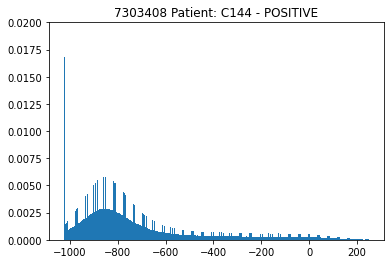

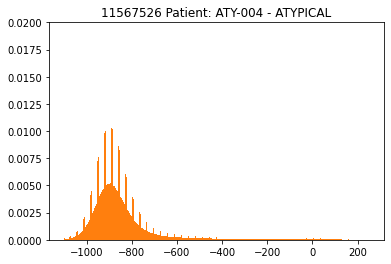

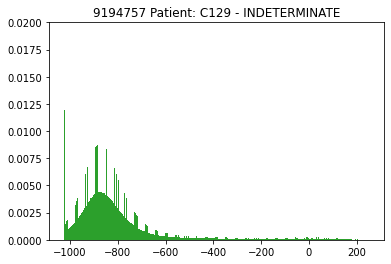

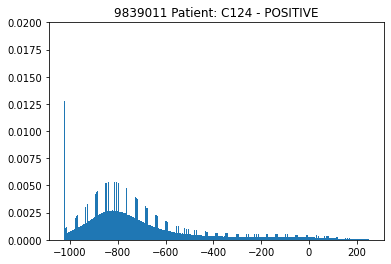

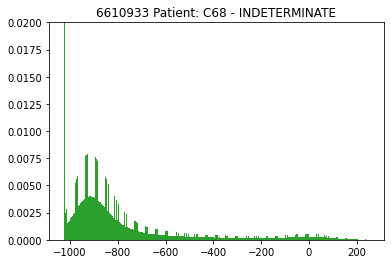

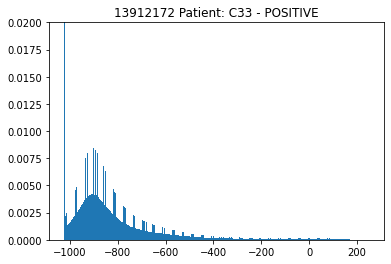

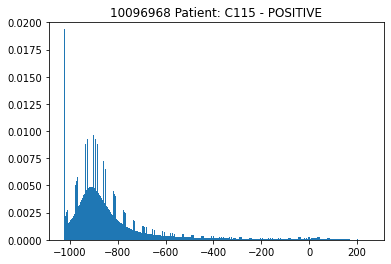

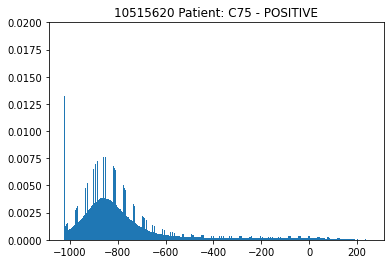

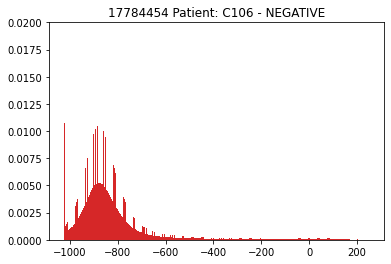

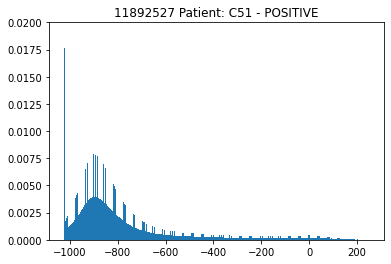

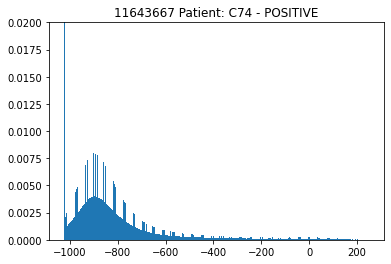

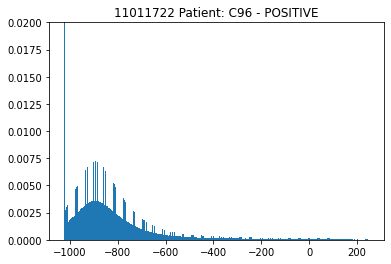

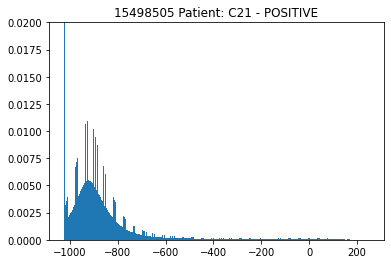

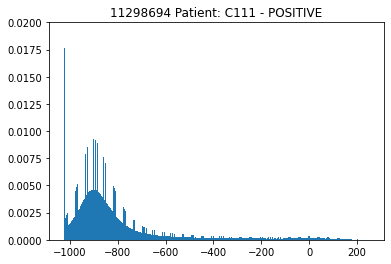

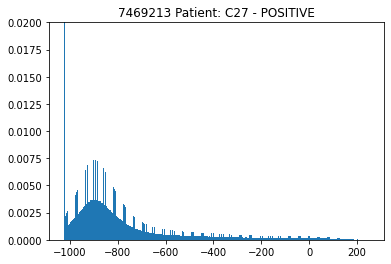

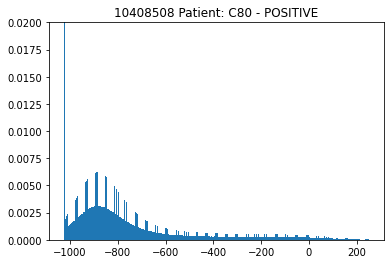

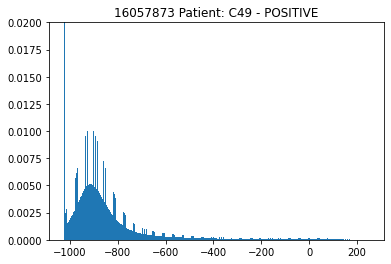

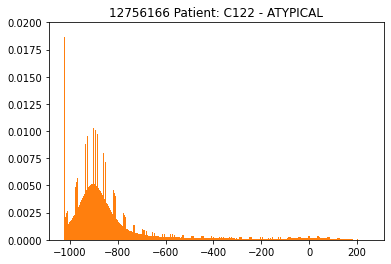

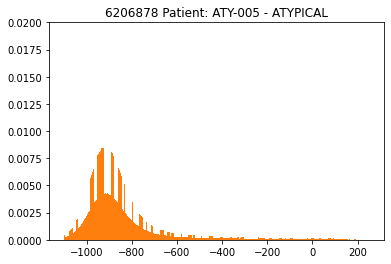

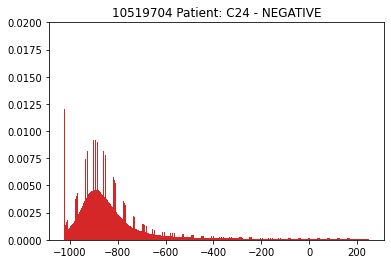

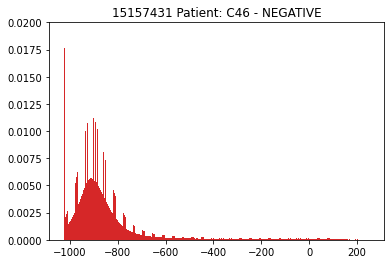

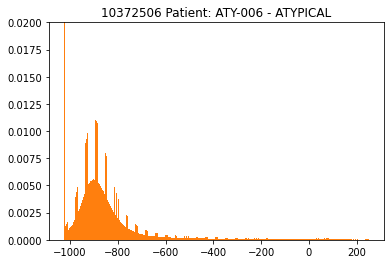

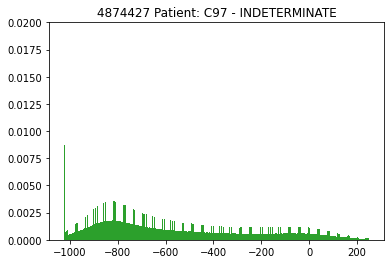

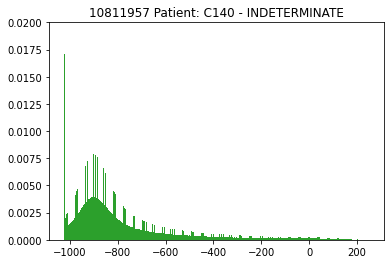

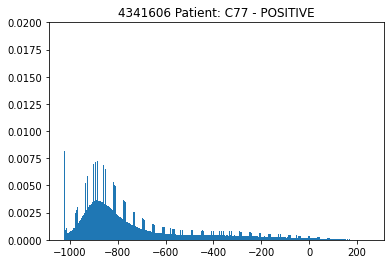

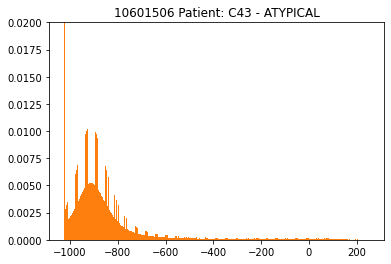

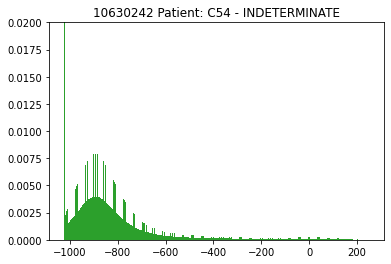

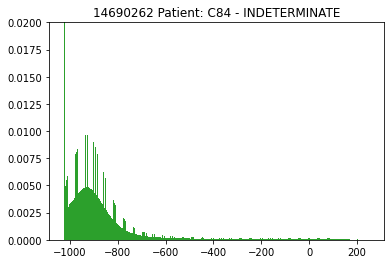

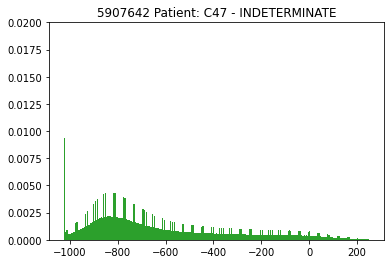

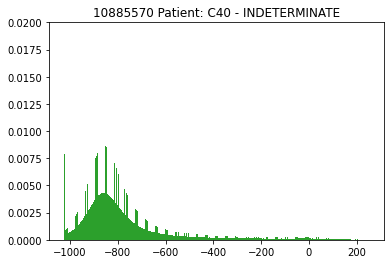

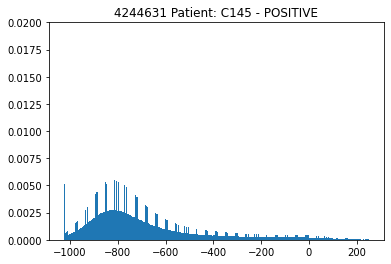

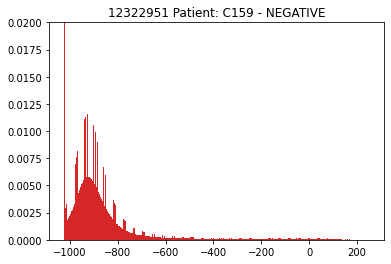

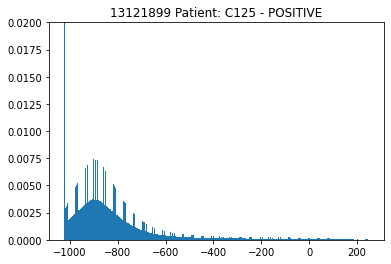

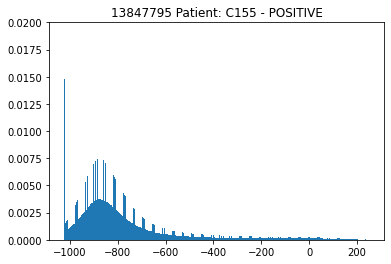

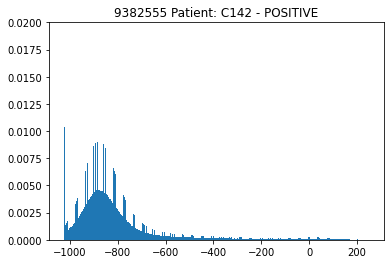

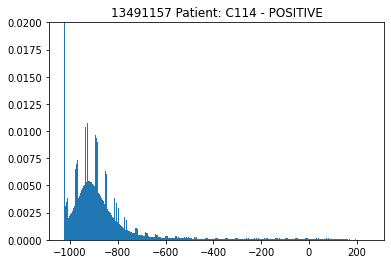

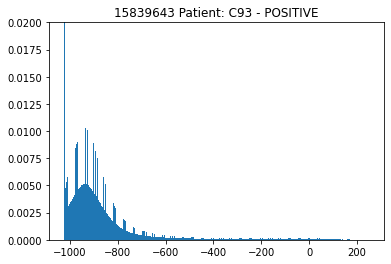

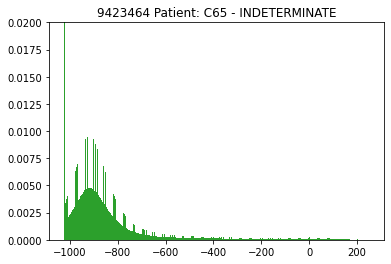

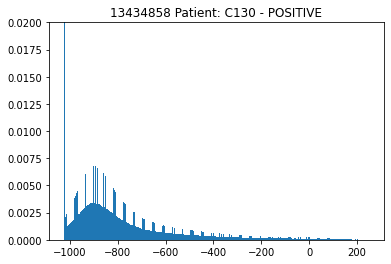

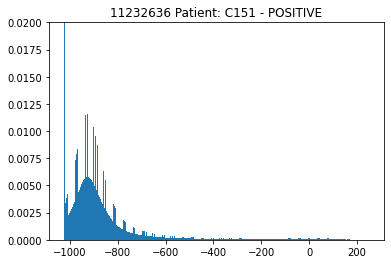

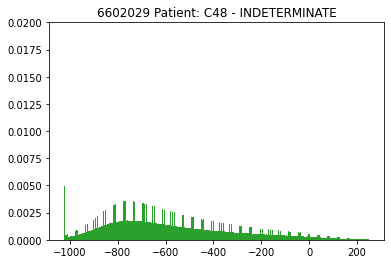

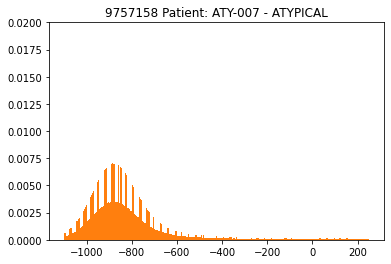

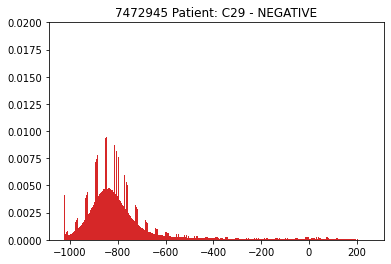

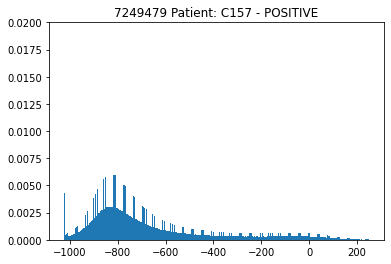

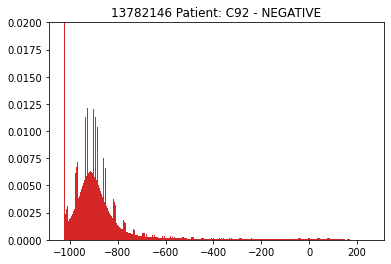

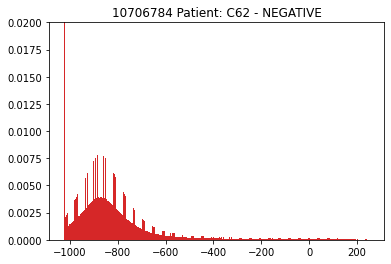

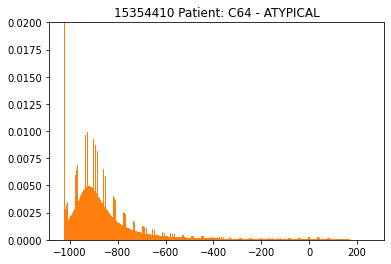

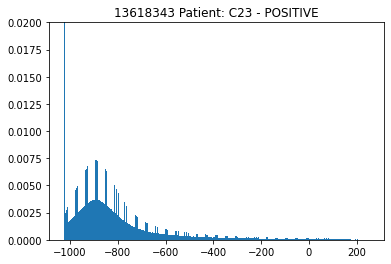

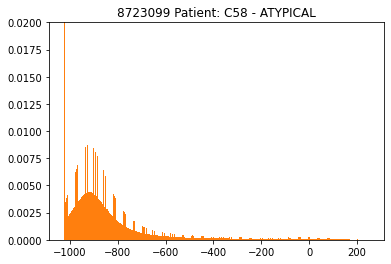

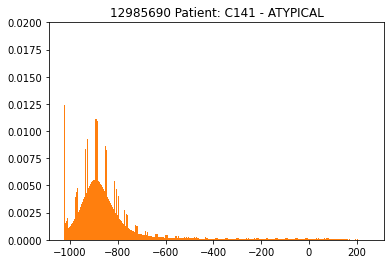

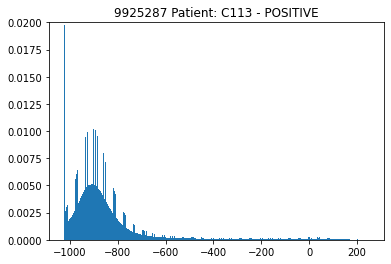

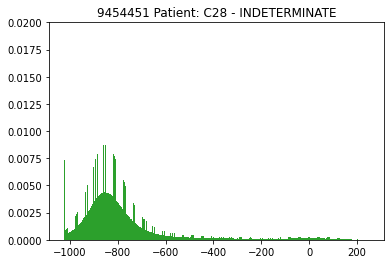

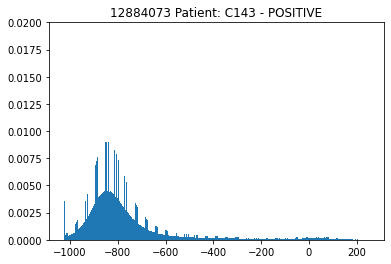

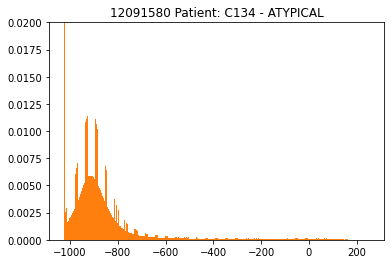

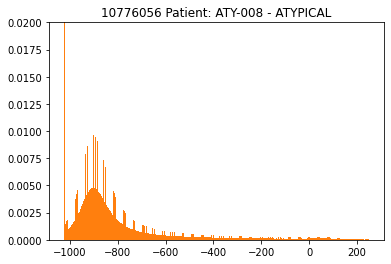

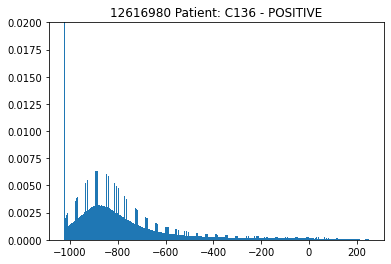

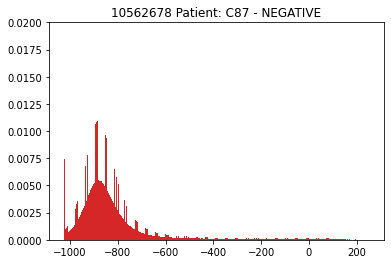

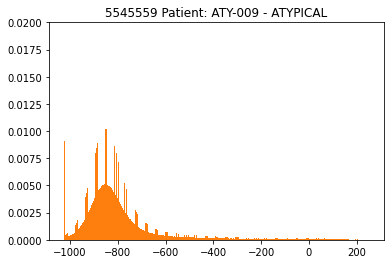

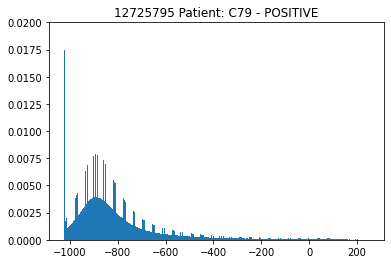

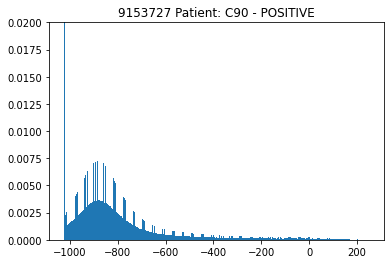

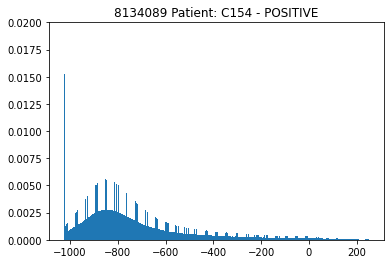

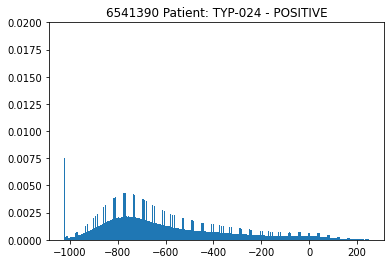

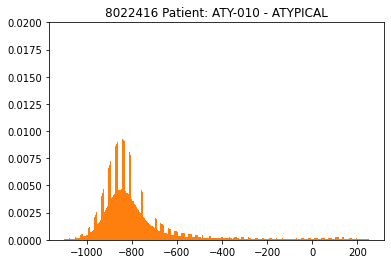

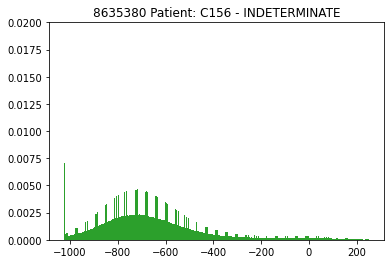

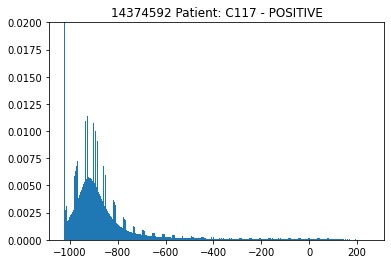

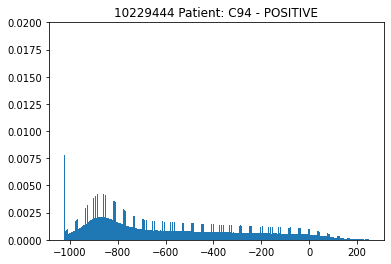

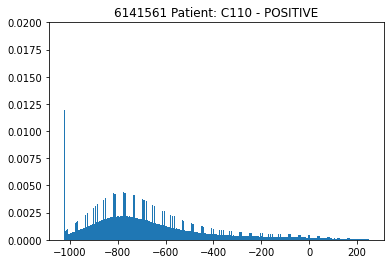

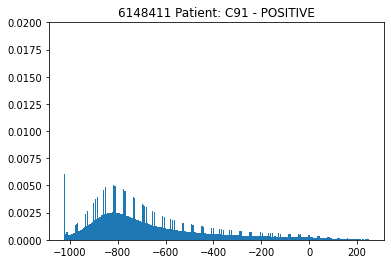

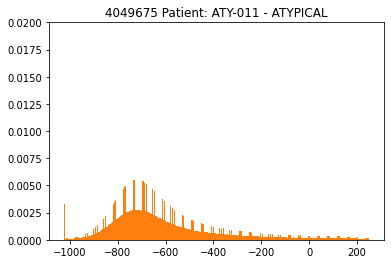

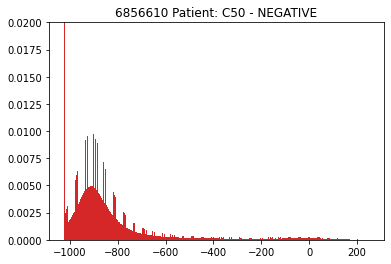

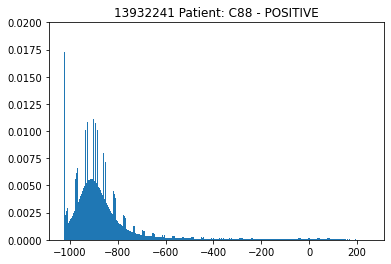

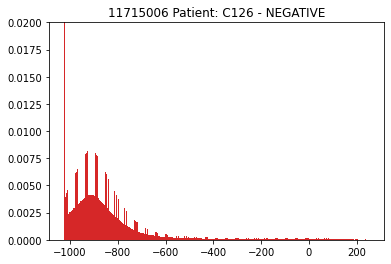

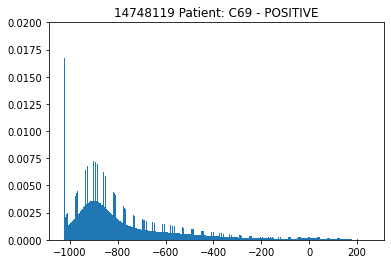

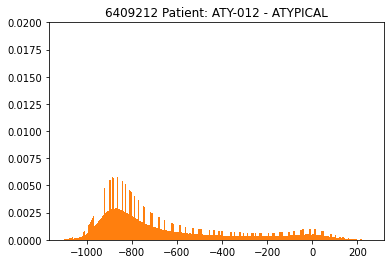

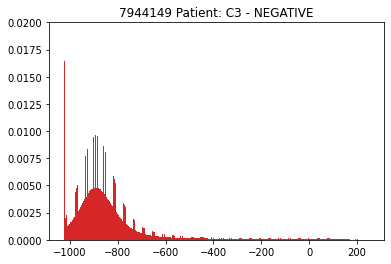

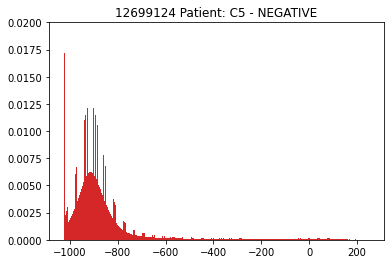

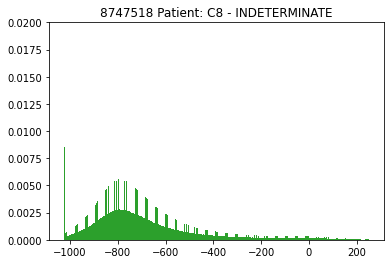

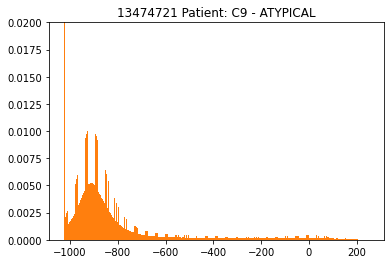

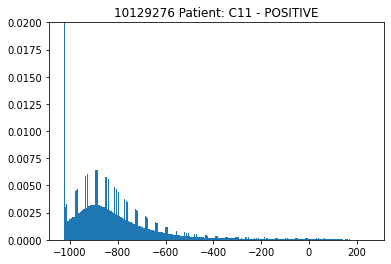

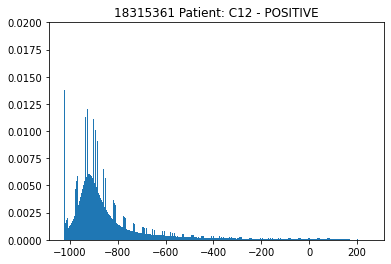

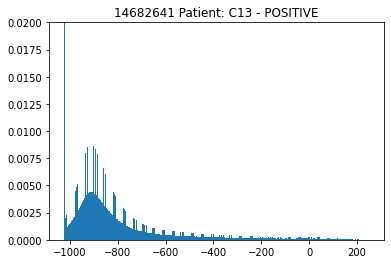

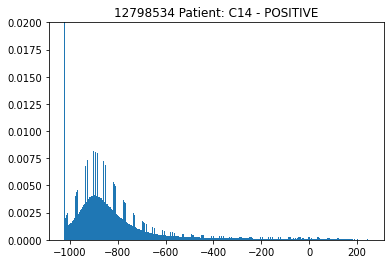

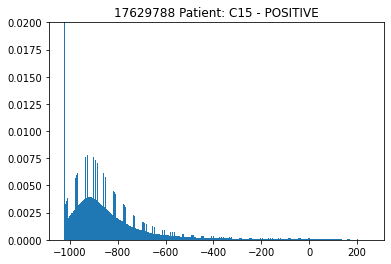

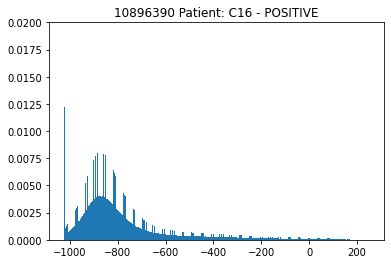

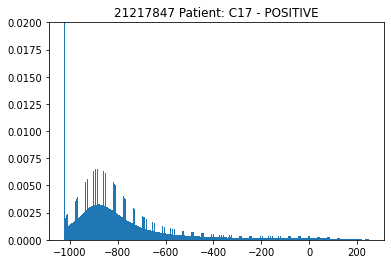

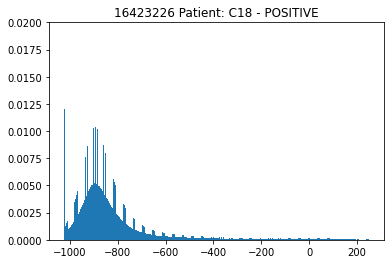

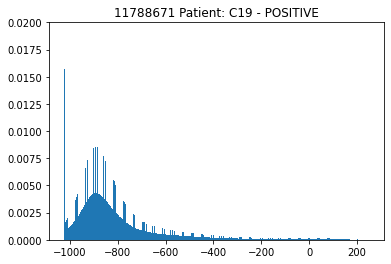

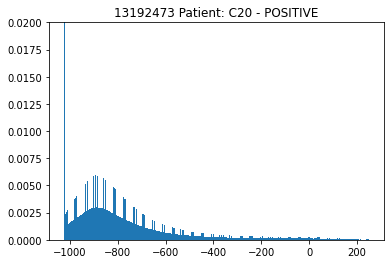

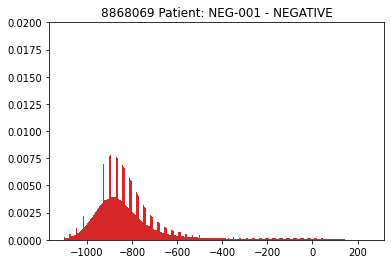

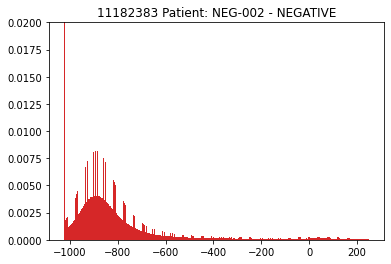

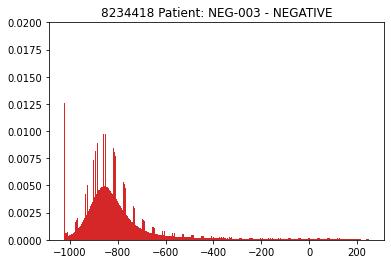

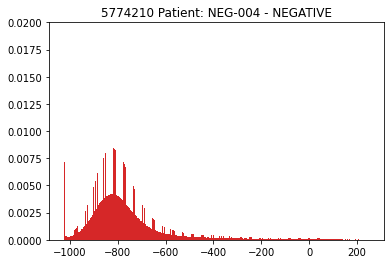

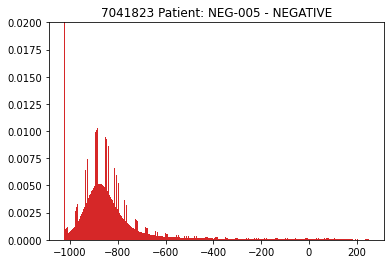

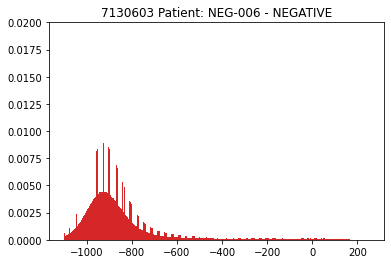

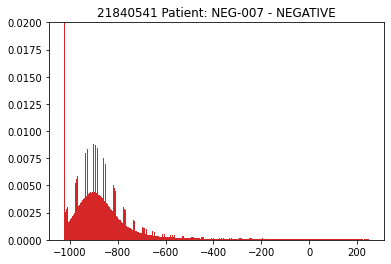

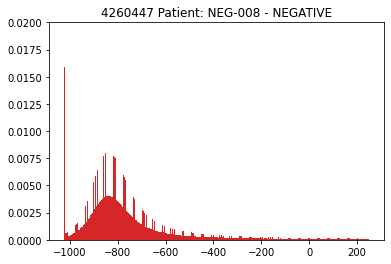

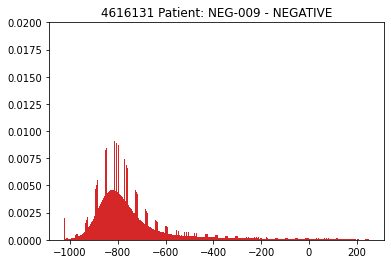

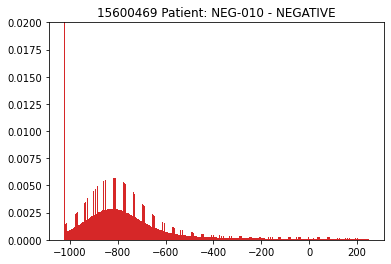

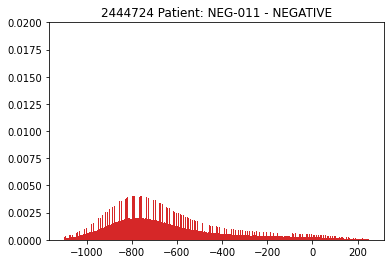

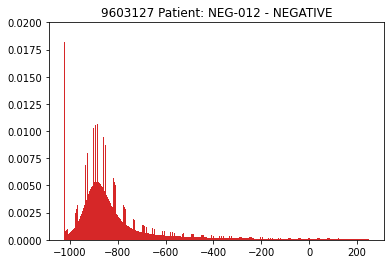

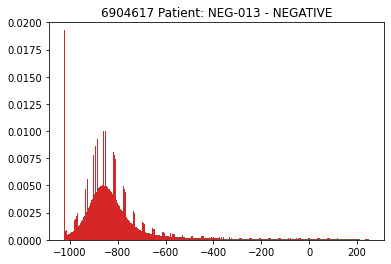

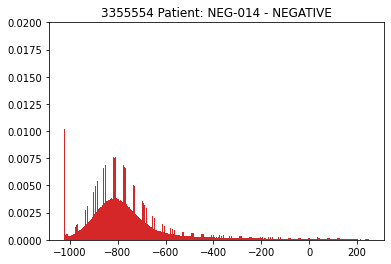

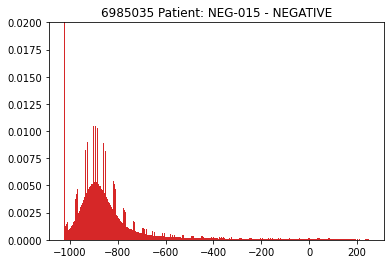

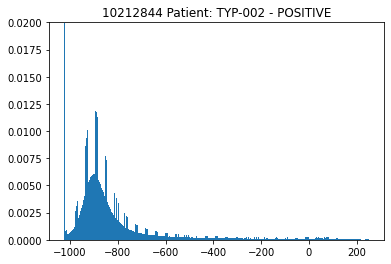

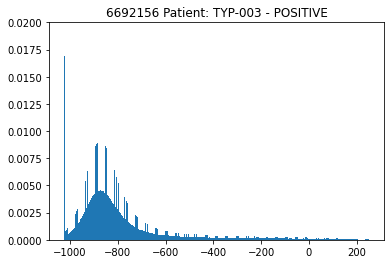

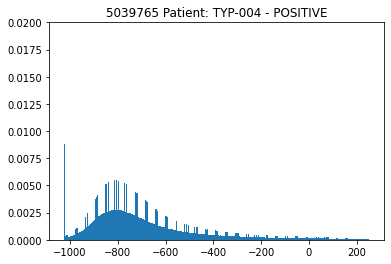

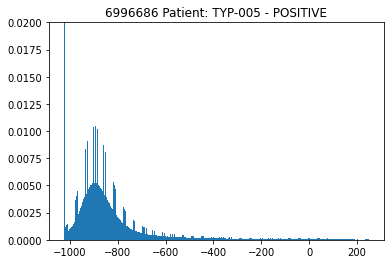

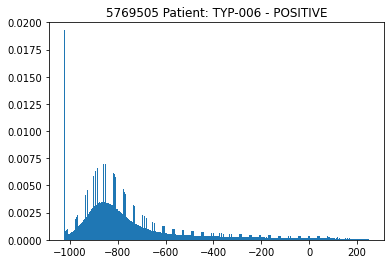

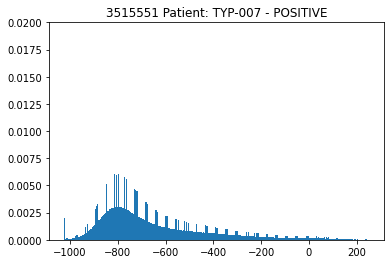

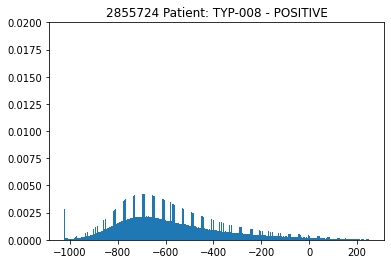

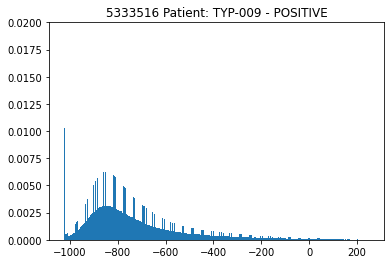

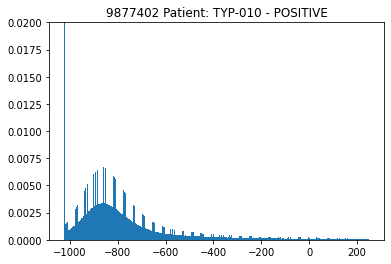

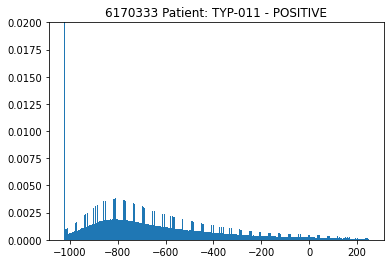

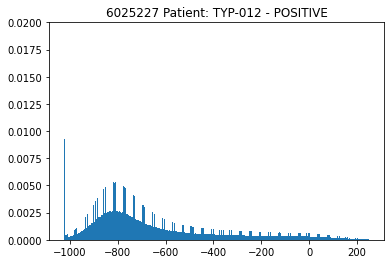

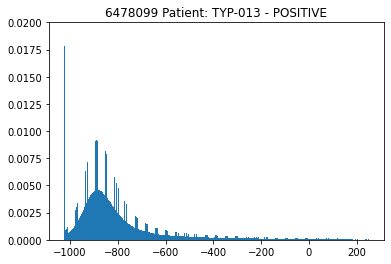

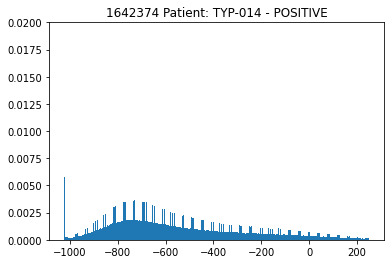

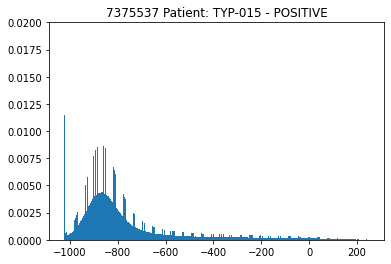

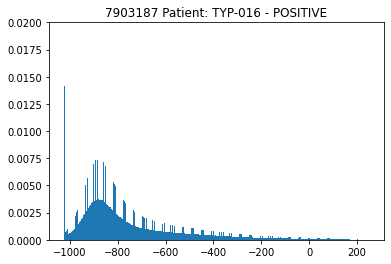

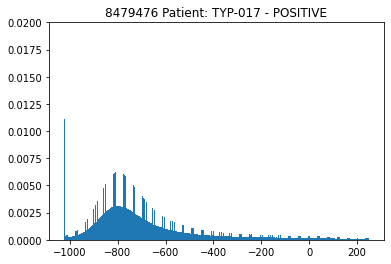

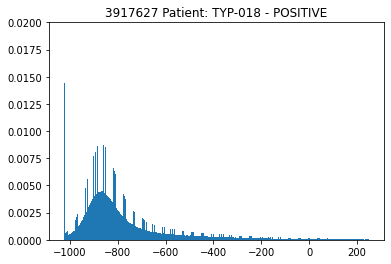

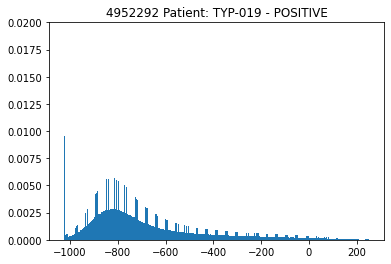

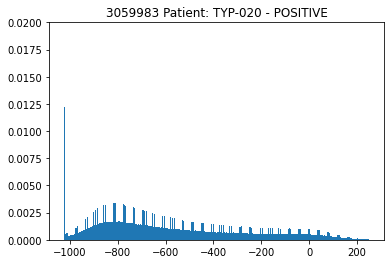

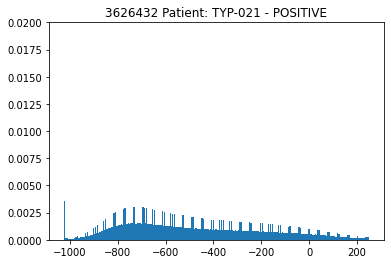

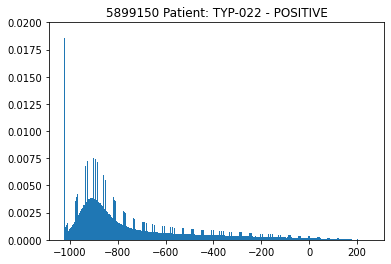

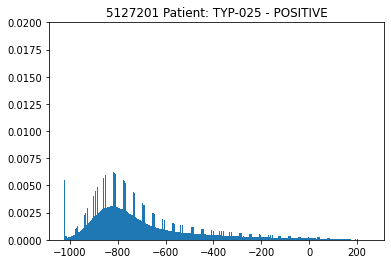

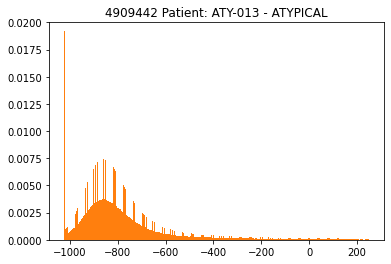

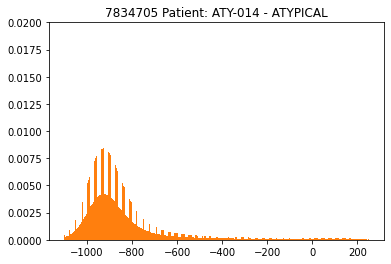

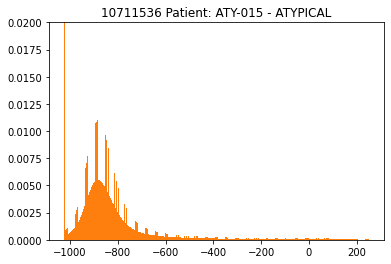

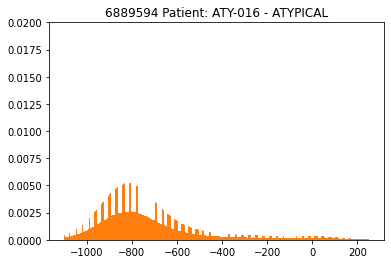

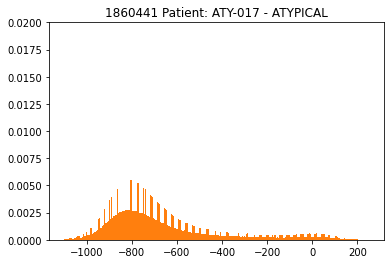

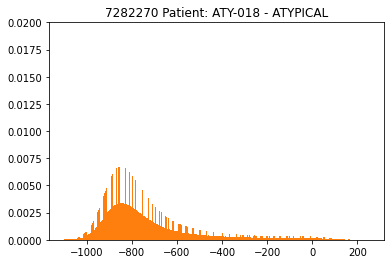

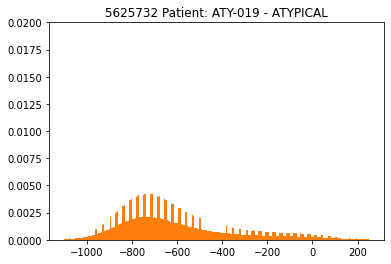

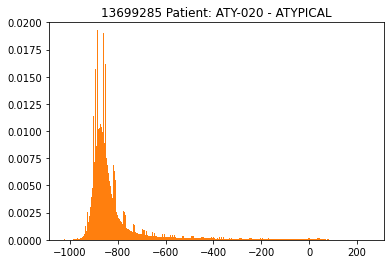

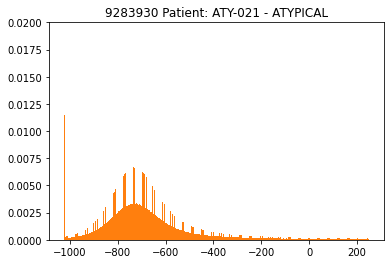

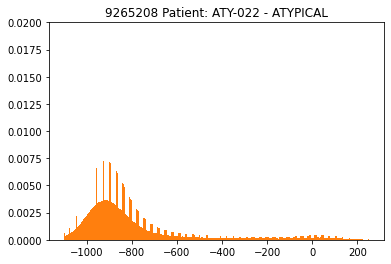

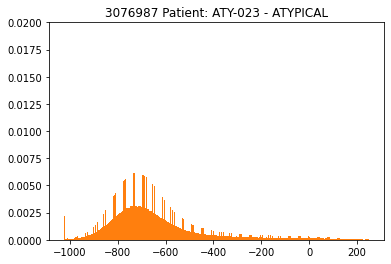

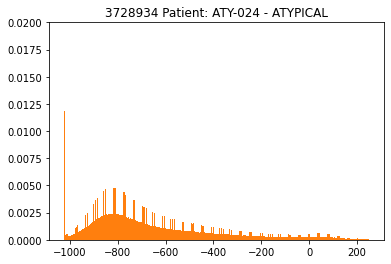

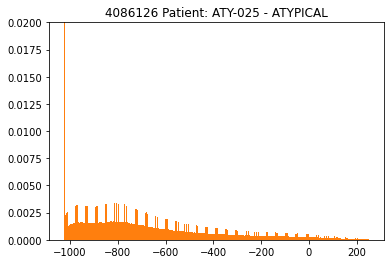

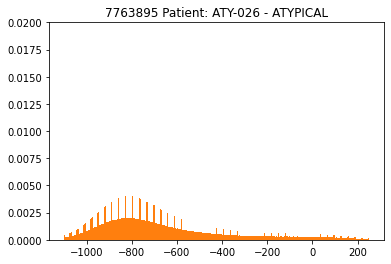

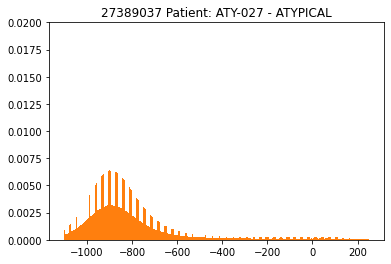

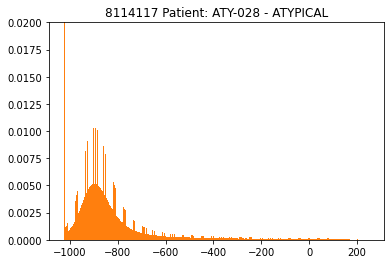

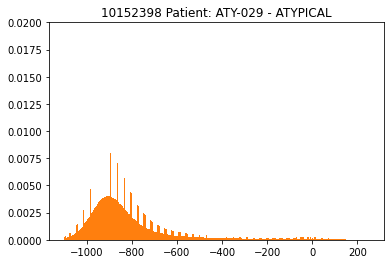

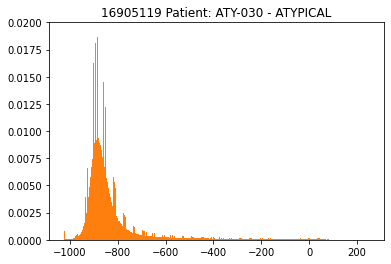

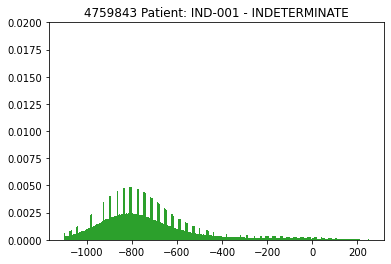

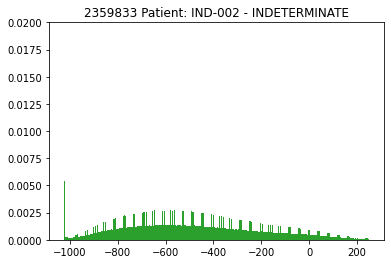

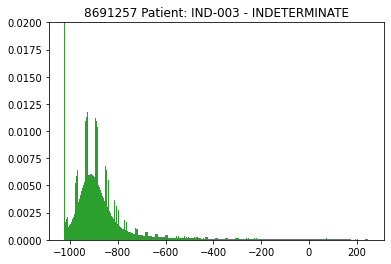

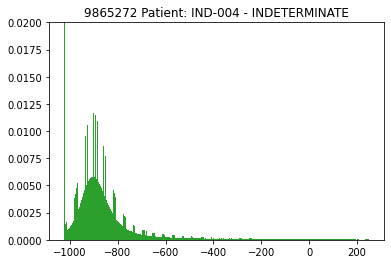

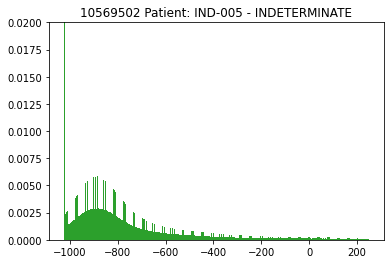

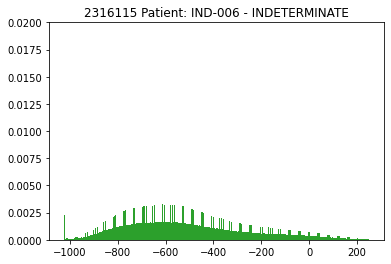

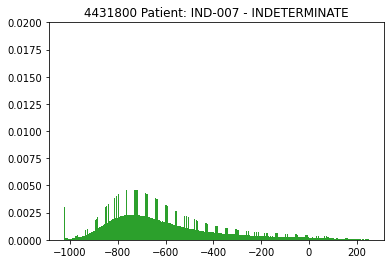

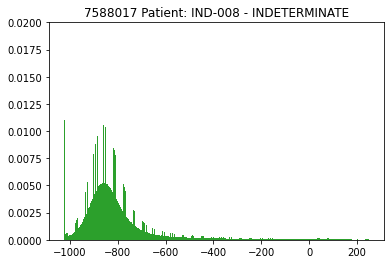

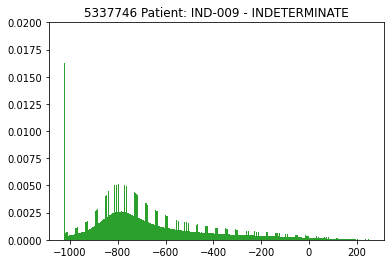

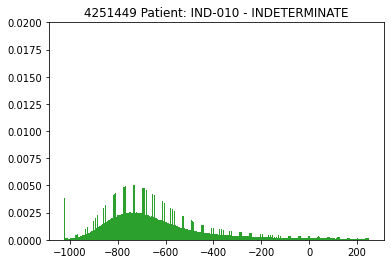

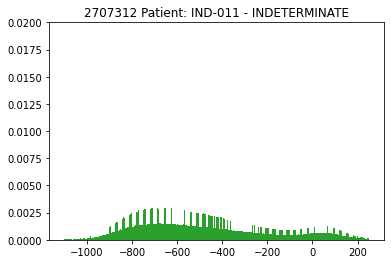

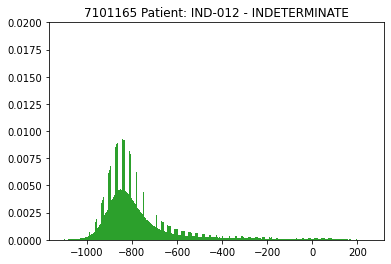

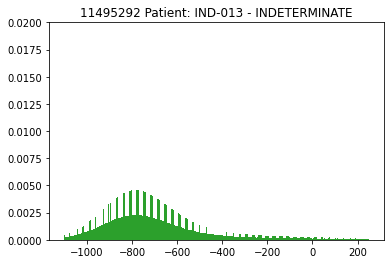

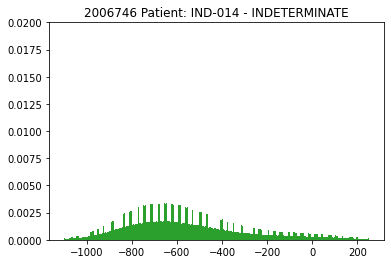

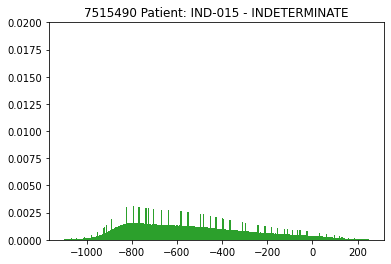

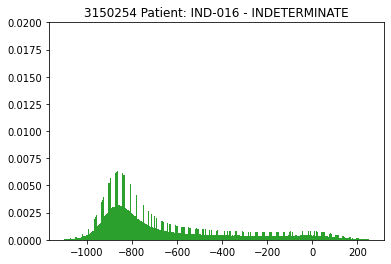

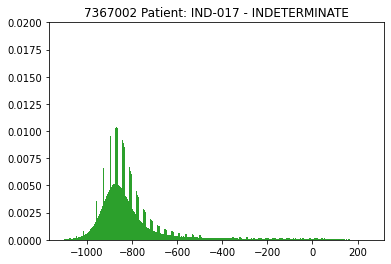

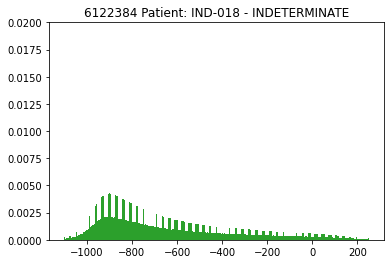

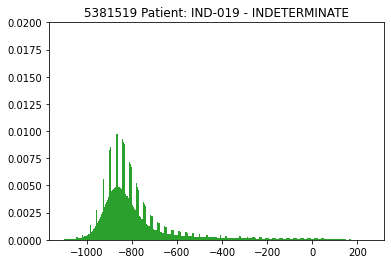

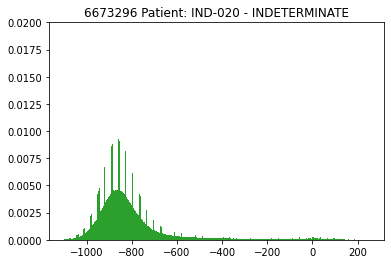

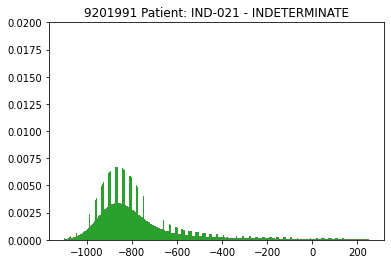

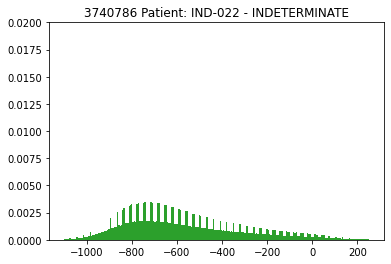

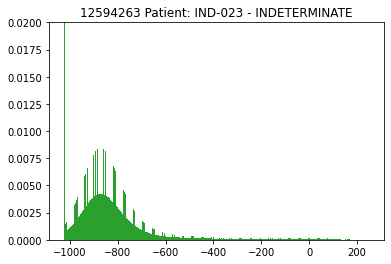

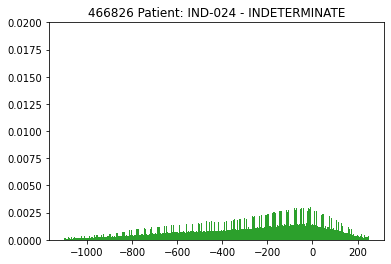

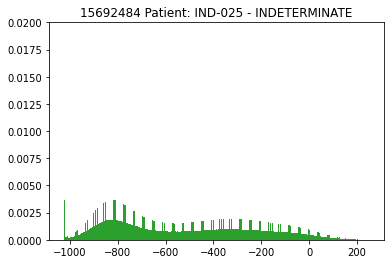

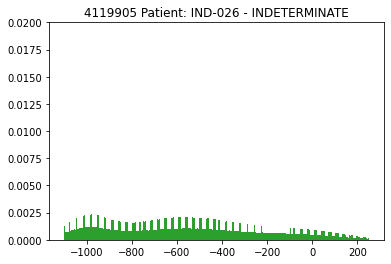

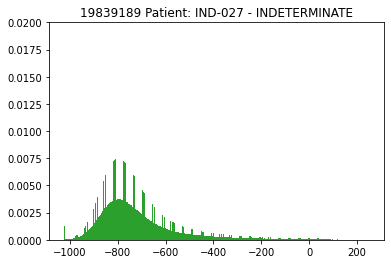

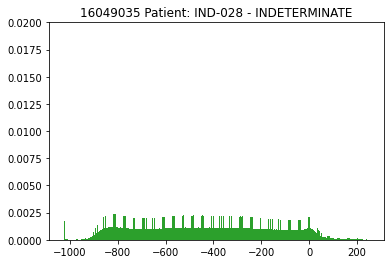

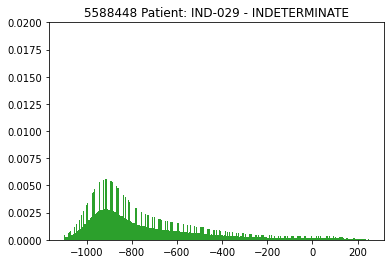

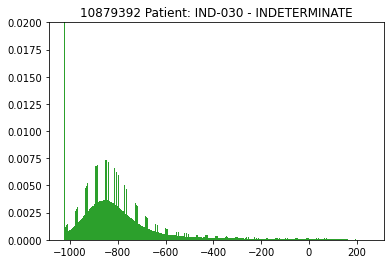

In [69]:
val2 = 250
val3 = -1100
n_bins = 1000
for p in dict_paths: #['TYP-004']:
    if p not in dict_diagnosis: continue
    diagnosis = dict_diagnosis[p]
    img_ori = nib.load(dict_paths[p])
    data_ori = img_ori.get_fdata()
    x = data_ori.ravel()
    val = x[0]
    x = np.delete(x, np.where(x == val))
    x = np.delete(x, np.where(x > val2))
    x = np.delete(x, np.where(x < val3))
    x = np.sort(x) 
    counts = x.copy()
    counts = counts.astype(float)
    counts[:] = 1.0/x.shape[0]
    plt.title(f'{x.shape[0]} Patient: {p} - {diagnosis}')
    plt.ylim(top=0.02)
    plt.hist(x, bins=n_bins, weights=counts, color=COLORS[diagnosis])
    plt.savefig(f'{OUTPUT_PATH}/{diagnosis}/{p}', orientation='portrait', pad_inches=0.1)
    plt.show()
    

14388884